In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loop through .db3 files, do SQL query to combine tables, and add to composite dataframe.

In [3]:
for ns in range(11):
    for ew in range(11):
        if ns<10 and ew<10:
            filename=f'./data/G0{ns}_0{ew}.db3'
        elif ns<10:
            filename=f'./data/G0{ns}_{ew}.db3'
        elif ew<10:
            filename=f'./data/G{ns}_0{ew}.db3'
        else:
            filename=f'./data/G{ns}_{ew}.db3'
        print(filename)
        dat = sqlite3.connect(filename) 
        querystring = """ SELECT l.*, lm.*, c.*, cm.*
                        FROM logs AS l
                        INNER JOIN logmemo AS lm 
                        ON l.lLogId = lm.lLogId
                        INNER JOIN caches AS c
                        ON l.lParent = c.Code
                        INNER JOIN cachememo AS cm
                        ON l.lParent = cm.Code """
        if (ns+ew)==0:
            df = pd.read_sql_query(querystring,dat)
        else:
            df_new = pd.read_sql_query(querystring,dat)
            df= df.append(df_new)

# https://stackoverflow.com/questions/36028759/how-to-open-and-convert-sqlite-database-to-p
# And much appreciated help from Varun!

./data/G00_00.db3
./data/G00_01.db3
./data/G00_02.db3
./data/G00_03.db3
./data/G00_04.db3
./data/G00_05.db3
./data/G00_06.db3
./data/G00_07.db3
./data/G00_08.db3
./data/G00_09.db3
./data/G00_10.db3
./data/G01_00.db3
./data/G01_01.db3
./data/G01_02.db3
./data/G01_03.db3
./data/G01_04.db3
./data/G01_05.db3
./data/G01_06.db3
./data/G01_07.db3
./data/G01_08.db3
./data/G01_09.db3
./data/G01_10.db3
./data/G02_00.db3
./data/G02_01.db3
./data/G02_02.db3
./data/G02_03.db3
./data/G02_04.db3
./data/G02_05.db3
./data/G02_06.db3
./data/G02_07.db3
./data/G02_08.db3
./data/G02_09.db3
./data/G02_10.db3
./data/G03_00.db3
./data/G03_01.db3
./data/G03_02.db3
./data/G03_03.db3
./data/G03_04.db3
./data/G03_05.db3
./data/G03_06.db3
./data/G03_07.db3
./data/G03_08.db3
./data/G03_09.db3
./data/G03_10.db3
./data/G04_00.db3
./data/G04_01.db3
./data/G04_02.db3
./data/G04_03.db3
./data/G04_04.db3
./data/G04_05.db3
./data/G04_06.db3
./data/G04_07.db3
./data/G04_08.db3
./data/G04_09.db3
./data/G04_10.db3
./data/G05

### Save to disk, then reload and check.

In [6]:
df.to_csv('./data/caches_raw.csv',index=False)


In [8]:
df = pd.read_csv('./data/caches_raw.csv')
df.columns

Index(['lParent', 'lLogId', 'lType', 'lBy', 'lDate', 'lLat', 'lLon',
       'lEncoded', 'lownerid', 'lHasHtml', 'lIsowner', 'lTime', 'lParent.1',
       'lLogId.1', 'lText', 'Code', 'Name', 'Distance', 'PlacedBy', 'Archived',
       'Bearing', 'CacheId', 'CacheType', 'Changed', 'Container', 'County',
       'Country', 'Degrees', 'Difficulty', 'DNF', 'DNFDate', 'Found',
       'FoundCount', 'FoundByMeDate', 'FTF', 'HasCorrected', 'HasTravelBug',
       'HasUserNote', 'LastFoundDate', 'LastGPXDate', 'LastLog',
       'LastUserDate', 'Latitude', 'Lock', 'LongHtm', 'Longitude', 'MacroFlag',
       'MacroSort', 'NumberOfLogs', 'OwnerId', 'OwnerName', 'PlacedDate',
       'ShortHtm', 'SmartName', 'SmartOverride', 'Source', 'State', 'Symbol',
       'TempDisabled', 'Terrain', 'UserData', 'User2', 'User3', 'User4',
       'UserFlag', 'UserNoteDate', 'UserSort', 'Watch', 'IsOwner',
       'LatOriginal', 'LonOriginal', 'Created', 'Status', 'Color', 'ChildLoad',
       'LinkedTo', 'GetPolyFlag', 

In [9]:
df.shape

(125722, 90)

In [10]:
df.head()

,lParent,lLogId,lType,lBy,lDate,lLat,lLon,lEncoded,lownerid,lHasHtml,...,IsPremium,Guid,FavPoints,Code.1,LongDescription,ShortDescription,Url,Hints,UserNote,TravelBugs
0,GC1A1E7,986540614,Found it,TotallyTerri,2020-12-31,NaN,NaN,0,4757811,0,...,1,NaN,1,GC1A1E7,This doesn't qualify as one of my river/railro...,NaN,http://coord.info/GC1A1E7,NaN,NaN,NaN
1,GC1A1E7,986540358,Found it,TeamMonroe1,2020-12-31,NaN,NaN,0,27901133,0,...,1,NaN,1,GC1A1E7,This doesn't qualify as one of my river/railro...,NaN,http://coord.info/GC1A1E7,NaN,NaN,NaN
2,GC1A1E7,986171373,Found it,SamBamFam,2020-12-30,NaN,NaN,0,8061150,0,...,1,NaN,1,GC1A1E7,This doesn't qualify as one of my river/railro...,NaN,http://coord.info/GC1A1E7,NaN,NaN,NaN
3,GC1A1E7,977747941,Found it,GazzaEC,2020-11-12,NaN,NaN,0,30994881,0,...,1,NaN,1,GC1A1E7,This doesn't qualify as one of my river/railro...,NaN,http://coord.info/GC1A1E7,NaN,NaN,NaN
4,GC1A1E7,925205611,Found it,Ekuflar,2020-05-03,NaN,NaN,0,5873441,0,...,1,NaN,1,GC1A1E7,This doesn't qualify as one of my river/railro...,NaN,http://coord.info/GC1A1E7,NaN,NaN,NaN


### Preliminary EDA - First Look:

In [12]:
df['Latitude'] = pd.to_numeric(df['Latitude'])

In [13]:
df['Longitude'] = pd.to_numeric(df['Longitude'])

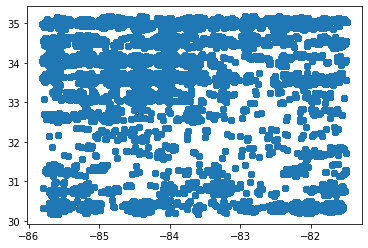

In [36]:
# locations of caches:

plt.scatter(df['Longitude'],df['Latitude']);

In [37]:
# locations of API pull centers:

lat_centers = 30.35 + np.array(range(11))*0.465
lon_centers = -85.6 + np.array(range(11))*0.39
center_coords = []
for y in lat_centers:
    for x in lon_centers:
        coord_dict = {
            'x': x,
            'y': y
        }
        center_coords.append(coord_dict)
centers = pd.DataFrame(center_coords)        

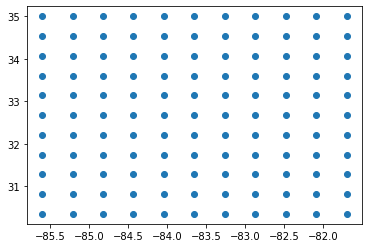

In [38]:
plt.scatter(centers['x'],centers['y']);

In [39]:
# Make API pull circles around each center point to illustrate data collection:

lat_centers = 30.35 + np.array(range(11))*0.465
lon_centers = -85.6 + np.array(range(11))*0.39
theta = np.array(range(720))*np.pi/360
bound_coords = []
for y in lat_centers:
    for x in lon_centers:
        for t in theta:
            dx = 20*np.cos(t)
            dx = dx/(6371*np.cos(y*np.pi/180))
            dx = dx*180/np.pi
            dx = x + dx
            dy = 20*np.sin(t)
            dy = dy/(6371)
            dy = dy*180/np.pi
            dy = y + dy
            coord_dict = {
                'x': dx,
                'y': dy
            }
            bound_coords.append(coord_dict)
boundaries = pd.DataFrame(bound_coords)        

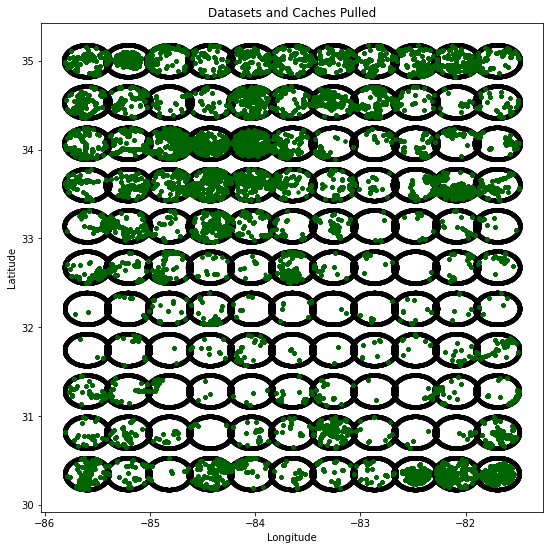

In [41]:
# combined plot:

fig = plt.figure(figsize=(9,9));
plt.scatter(boundaries['x'],boundaries['y'],color='black',marker='.');
plt.scatter(df['Longitude'],df['Latitude'],color='darkgreen',marker='.');
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.title('Datasets and Caches Pulled');

In [19]:
features = ['lLogId', 'lType', 'lDate', 
       'lTime', 'lText', 'Code', 'Name', 'PlacedBy', 'Archived',
       'CacheType', 'Container', 'County',
       'Degrees', 'Difficulty', 'DNF', 'DNFDate', 
       'FTF', 'HasCorrected', 'HasTravelBug',
       'LastFoundDate', 'LastLog',
       'Latitude', 'Longitude', 'NumberOfLogs', 'OwnerId', 'PlacedDate',
       'TempDisabled', 'Terrain', 
       'LatOriginal', 'LonOriginal', 'Created', 'Status', 
       'Elevation', 'Resolution', 'GcNote',
       'IsPremium', 'FavPoints', 'LongDescription',
       'ShortDescription', 'Hints', 'TravelBugs']


df[features].head()

,lLogId,lType,lDate,lTime,lText,Code,Name,PlacedBy,Archived,CacheType,...,Status,Elevation,Resolution,GcNote,IsPremium,FavPoints,LongDescription,ShortDescription,Hints,TravelBugs
0,986540614,Found it,2020-12-31,12:31:00,Found with my sweetie TeamMonroe1. TFTC!,GC1A1E7,Nickajack Two for One,David,0,T,...,A,0.0,NaN,NaN,1,1,This doesn't qualify as one of my river/railro...,NaN,NaN,NaN
1,986540358,Found it,2020-12-31,12:29:55,Found with my beloved TeamMonroe2. TFTC,GC1A1E7,Nickajack Two for One,David,0,T,...,A,0.0,NaN,NaN,1,1,This doesn't qualify as one of my river/railro...,NaN,NaN,NaN
2,986171373,Found it,2020-12-30,12:00:00,TFTC\r\nNice quick find. Adding to my TN quad...,GC1A1E7,Nickajack Two for One,David,0,T,...,A,0.0,NaN,NaN,1,1,This doesn't qualify as one of my river/railro...,NaN,NaN,NaN
3,977747941,Found it,2020-11-12,12:01:16,Got it. Log in good shape,GC1A1E7,Nickajack Two for One,David,0,T,...,A,0.0,NaN,NaN,1,1,This doesn't qualify as one of my river/railro...,NaN,NaN,NaN
4,925205611,Found it,2020-05-03,12:00:00,A quick stop and grab. \r\n\r\nThanks for the ...,GC1A1E7,Nickajack Two for One,David,0,T,...,A,0.0,NaN,NaN,1,1,This doesn't qualify as one of my river/railro...,NaN,NaN,NaN


In [20]:
for ftr in features:
    print(ftr)
    print(df[ftr].head())
    print()

lLogId
0    986540614
1    986540358
2    986171373
3    977747941
4    925205611
Name: lLogId, dtype: int64

lType
0    Found it
1    Found it
2    Found it
3    Found it
4    Found it
Name: lType, dtype: object

lDate
0    2020-12-31
1    2020-12-31
2    2020-12-30
3    2020-11-12
4    2020-05-03
Name: lDate, dtype: object

lTime
0    12:31:00
1    12:29:55
2    12:00:00
3    12:01:16
4    12:00:00
Name: lTime, dtype: object

lText
0             Found with my sweetie TeamMonroe1. TFTC!
1              Found with my beloved TeamMonroe2. TFTC
2    TFTC\r\nNice quick find.  Adding to my TN quad...
3                            Got it. Log in good shape
4    A quick stop and grab. \r\n\r\nThanks for the ...
Name: lText, dtype: object

Code
0    GC1A1E7
1    GC1A1E7
2    GC1A1E7
3    GC1A1E7
4    GC1A1E7
Name: Code, dtype: object

Name
0    Nickajack Two for One
1    Nickajack Two for One
2    Nickajack Two for One
3    Nickajack Two for One
4    Nickajack Two for One
Name: Name, dtype: obj

In [26]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76172 entries, 0 to 76171
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lLogId            76172 non-null  int64  
 1   lType             76172 non-null  object 
 2   lDate             76172 non-null  object 
 3   lTime             76172 non-null  object 
 4   lText             76164 non-null  object 
 5   Code              76172 non-null  object 
 6   Name              76172 non-null  object 
 7   PlacedBy          76172 non-null  object 
 8   Archived          76172 non-null  int64  
 9   CacheType         76172 non-null  object 
 10  Container         76172 non-null  object 
 11  County            0 non-null      float64
 12  Degrees           76172 non-null  float64
 13  Difficulty        76172 non-null  float64
 14  DNF               76172 non-null  int64  
 15  DNFDate           0 non-null      float64
 16  FTF               76172 non-null  int64 

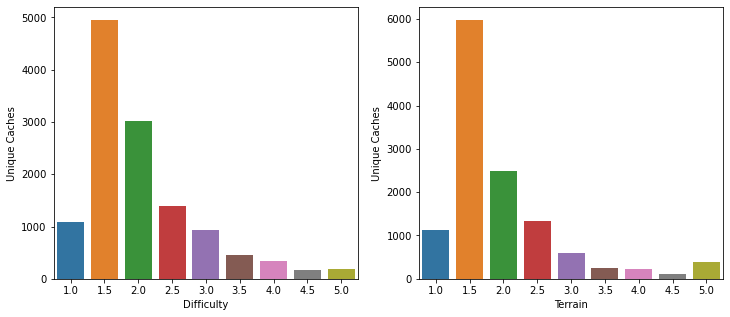

In [42]:
# distribution of "Difficulty" and "Terrain"

fig = plt.figure(figsize=(12,5));
ax = fig.add_subplot(121);
chk = pd.DataFrame(df.groupby(['Difficulty']).Name.nunique())
chk.columns = ['Unique Caches']
chk['Difficulty'] = 1 + np.array(range(9))*0.5
sns.barplot(data=chk,x='Difficulty',y='Unique Caches');

ax = fig.add_subplot(122);
chk = pd.DataFrame(df.groupby(['Terrain']).Name.nunique())
chk.columns = ['Unique Caches']
chk['Terrain'] = 1 + np.array(range(9))*0.5
sns.barplot(data=chk,x='Terrain',y='Unique Caches');

In [22]:
df['FavPoints'].describe()

count    125722.00000
mean          5.56438
std          20.57362
min           0.00000
25%           0.00000
50%           1.00000
75%           5.00000
max        1237.00000
Name: FavPoints, dtype: float64

In [23]:
df['Status'].value_counts()

A    123899
T      1823
Name: Status, dtype: int64

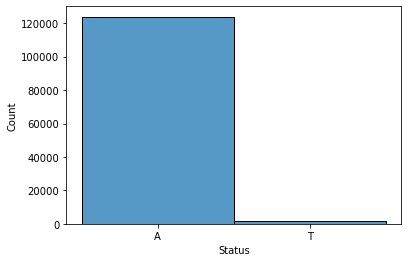

In [24]:
sns.histplot(data=df,x='Status');

In [25]:
df['FavPoints'].describe()

count    125722.00000
mean          5.56438
std          20.57362
min           0.00000
25%           0.00000
50%           1.00000
75%           5.00000
max        1237.00000
Name: FavPoints, dtype: float64

In [26]:
fp = list(df['FavPoints'])
sum([1 for p in fp if p<=50])/len(fp)*100

98.53645344490225

In [27]:
chk = pd.DataFrame(df.groupby(['FavPoints']).Name.nunique())
chk.columns = ['Unique Caches']
chk['FavPoints'] = chk.index

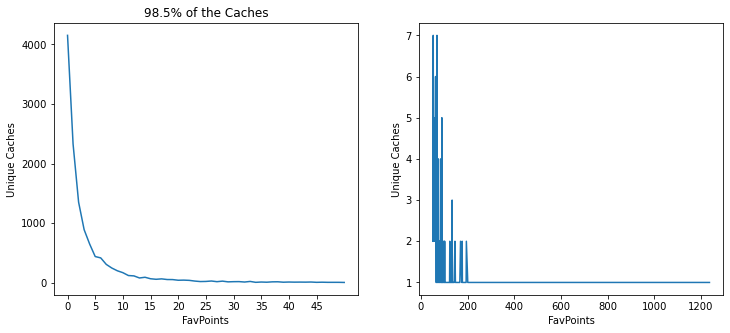

In [29]:
fig = plt.figure(figsize=(12,5));
ax = fig.add_subplot(121);
sns.lineplot(data=chk[chk['FavPoints']<=50],x='FavPoints',y='Unique Caches');
plt.xticks(range(0,50,5));
plt.title('98.5% of the Caches');
ax = fig.add_subplot(122);
sns.lineplot(data=chk[chk['FavPoints']>50],x='FavPoints',y='Unique Caches');


Check out some of the text fields:

In [30]:
print('LongDescription Samples:')
print()
print('__0__', df['LongDescription'][0])
print()
print('__10__', df['LongDescription'][10])
print()
print('__20__', df['LongDescription'][20])

LongDescription Samples:

__0__ This doesn't qualify as one of my river/railroad crossing caches, but it is close.<br />
<br />
Here is an interesting spot on Nickajack Lake with a <b>Two for One</b> for your statistical pleasure. Of course that isn't all this pretty spot provides. You can see the Tennessee River with all it has to offer - folks fishing and boating, birds looking for a meal, Nickajack Dam, and commerical barge traffic. You can see trains go by just across the highway and the sunset is quite nice too. I saw all of this during the 20 minutes I was there hiding the cache, shooting the coordinates, and photographing the benchmark. The benchmark disk EE1511 can be found on the southeast corner of the bridge further to the west of the listed coordinates.<br />
<br />
So come on out, leave your car at the parking coordinates, take a short walk, and enjoy the area.<br />
<br />
Tennessee State Highway 156 is between the railroad and both the cache and parking spot, so it isn't

In [31]:
print('ShortDescription Samples:')
print()
print('__0__', df['ShortDescription'][0])
print()
print('__10__', df['ShortDescription'][10])
print()
print('__20__', df['ShortDescription'][20])

ShortDescription Samples:

__0__ nan

__10__ nan

__20__ nan


In [32]:
print('Hints Samples:')
print()
print('__0__', df['Hints'][0])
print()
print('__10__', df['Hints'][10])
print()
print('__20__', df['Hints'][20])

Hints Samples:

__0__ nan

__10__ Clear container

__20__ Hidden in a hole/tunnel through a rock. About 5 feet off boardwalk, not on water side.


In [33]:
print('lText Samples:')
print()
print('__0__', df['lText'][0])
print()
print('__10__', df['lText'][10])
print()
print('__20__', df['lText'][20])

lText Samples:

__0__ Found with my sweetie TeamMonroe1. TFTC!

__10__ Could not find might have been washed away

__20__ Nice walk, pretty easy to find, even though it’s cleverly hidden.


In [34]:
df['Container'].value_counts()

Micro      52670
Small      30849
Regular    25325
Other      11358
Unknown     3569
Large       1061
Virtual      890
Name: Container, dtype: int64

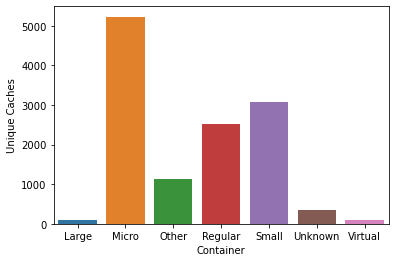

In [43]:
# container type:

chk = pd.DataFrame(df.groupby(['Container']).Name.nunique())
chk.columns = ['Unique Caches']
chk['Container'] = chk.index
sns.barplot(data=chk,x='Container',y='Unique Caches');


### Full EDA and cleaning will be done in the next notebook, EDA_cleaning.ipynb